In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

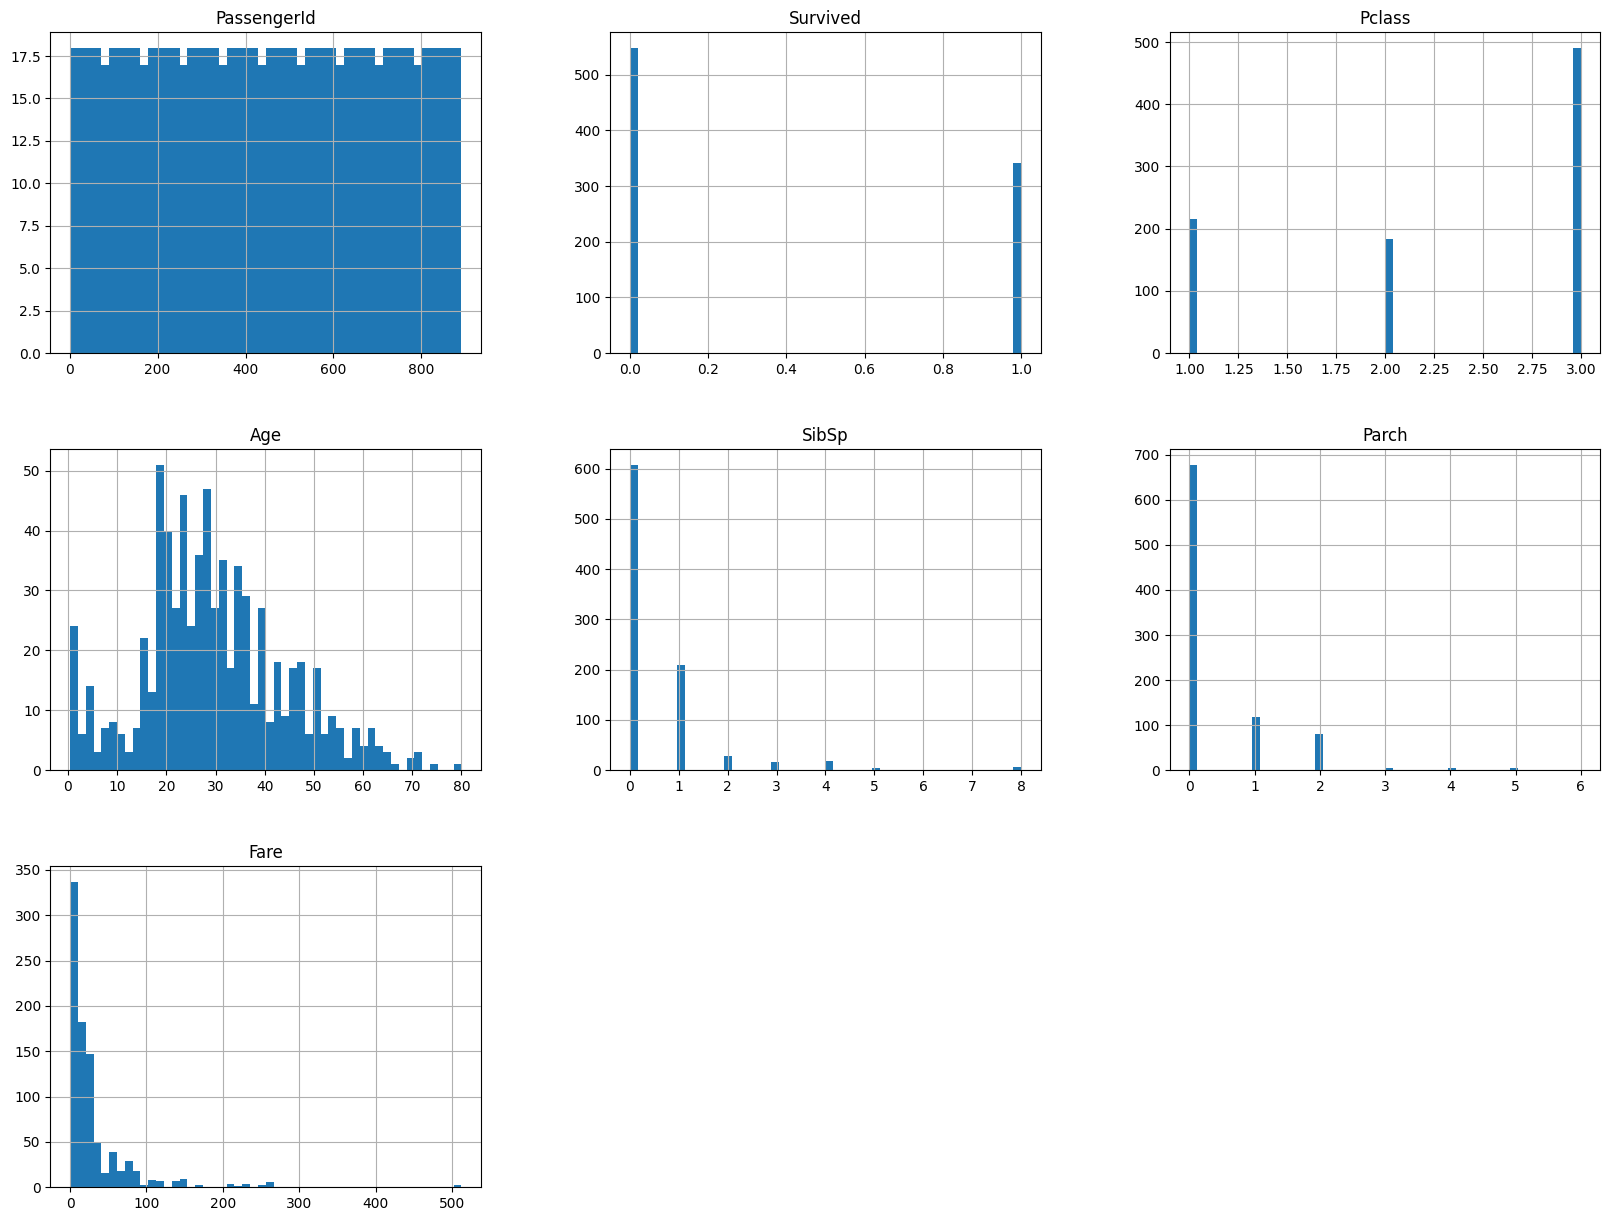

In [4]:
train_data.hist(bins=50, figsize=(20, 15))
plt.show

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
women = train_data.loc[train_data['Sex']=='female']['Survived']
rate_women = sum(women)/len(women)
print('rate of women:', rate_women)

rate of women: 0.7420382165605095


In [8]:
men = train_data.loc[train_data['Sex']=='male']['Survived']
rate_men = sum(men)/len(men)
print('rate of men:', rate_men)

rate of men: 0.18890814558058924


In [9]:
for i in range(1, 4):
    pclass = train_data.loc[train_data['Pclass']== i]['Survived']
    rate_pclass = pclass.mean()
    print(f'rate of pclass{i}', rate_pclass)

rate of pclass1 0.6296296296296297
rate of pclass2 0.47282608695652173
rate of pclass3 0.24236252545824846


In [10]:
a = 0  

for i in range(1, 81, 8):
    age = train_data.loc[(train_data['Age'] <= i) & (train_data['Age'] > a), 'Survived']
    
    if len(age) == 0:  
        rate_age = 0  
    else:
        rate_age = age.mean()  

    print(f'Rate of {a} < Age <= {i}: {rate_age}')
    
    a = i  

Rate of 0 < Age <= 1: 0.8571428571428571
Rate of 1 < Age <= 9: 0.5416666666666666
Rate of 9 < Age <= 17: 0.45098039215686275
Rate of 17 < Age <= 25: 0.3351063829787234
Rate of 25 < Age <= 33: 0.4074074074074074
Rate of 33 < Age <= 41: 0.43119266055045874
Rate of 41 < Age <= 49: 0.38235294117647056
Rate of 49 < Age <= 57: 0.4146341463414634
Rate of 57 < Age <= 65: 0.36
Rate of 65 < Age <= 73: 0.0


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train_data['Age'] = train_data.groupby(["Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
train_data['Fare'] = train_data['Fare'].apply(lambda x: np.log1p(x))
test_data['Fare'] = test_data['Fare'].apply(lambda x: np.log1p(x))

train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [14]:
train_data['AgeBin'] = pd.cut(train_data['Age'], bins=[0, 1, 9, 18, 60, 80], labels=[1, 2, 3, 4, 5])
test_data['AgeBin'] = pd.cut(test_data['Age'], bins=[0, 1, 9, 18, 60, 80], labels=[1, 2, 3, 4, 5])

In [15]:
train_data['Fare'].max()

6.240917354759096

In [16]:
b = 0  

for i in range(1, 8):
    fare = train_data.loc[(train_data['Fare'] <= i) & (train_data['Fare'] > b), 'Survived']
    
    if len(fare) == 0:  
        rate_fare = 0  
    else:
        rate_fare = fare.mean()  

    print(f'Rate of {b} < fare <= {i}: {rate_fare}')
    
    b = i  

Rate of 0 < fare <= 1: 0
Rate of 1 < fare <= 2: 0.0
Rate of 2 < fare <= 3: 0.278118609406953
Rate of 3 < fare <= 4: 0.4403292181069959
Rate of 4 < fare <= 5: 0.6964285714285714
Rate of 5 < fare <= 6: 0.6538461538461539
Rate of 6 < fare <= 7: 1.0


In [17]:
train_data['FareBin'] = pd.qcut(train_data['Fare'], 4, labels=[1, 2, 3, 4])
test_data['FareBin'] = pd.qcut(test_data['Fare'], 4, labels=[1, 2, 3, 4])

In [18]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data['Sex_num'] = train_data['Sex'].map({"male": 0, "female": 1})
test_data['Sex_num'] = test_data['Sex'].map({"male": 0, "female": 1})
train_data['Sex_num'] = train_data['Sex_num'] + 1
test_data['Sex_num'] = test_data['Sex_num'] + 1
train_data['sex_age_pclass'] = train_data['Age'] * train_data['Pclass'] * train_data['Sex_num']
test_data['sex_age_pclass'] = test_data['Age'] * test_data['Pclass'] * test_data['Sex_num']


train_data['IsChild'] = train_data['Age'].apply(lambda x: 1 if x < 18 else 0)
test_data['IsChild'] = test_data['Age'].apply(lambda x: 1 if x < 18 else 0)

In [19]:
train_data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
AgeBin              0
FareBin             0
FamilySize          0
Sex_num             0
sex_age_pclass      0
IsChild             0
dtype: int64

In [20]:
test_data.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             327
Embarked            0
AgeBin              0
FareBin             0
FamilySize          0
Sex_num             0
sex_age_pclass      0
IsChild             0
dtype: int64

In [21]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.')
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.')

common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
train_data['Title'] = train_data['Title'].apply(lambda x: x if x in common_titles else 'Rare')
test_data['Title'] = test_data['Title'].apply(lambda x: x if x in common_titles else 'Rare')

In [22]:
train_data['Fare/Family'] = train_data['Fare'] / train_data['FamilySize']
test_data['Fare/Family'] = test_data['Fare'] / test_data['FamilySize']

In [23]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


features = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Title', 'SibSp', 'Fare', 'IsChild', 'sex_age_pclass', 'Fare/Family', 'Embarked', 'Parch', 'AgeBin', 'FareBin']
X = train_data.drop(columns=['Survived'])
X = pd.get_dummies(X[features])
y = train_data['Survived']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

param_grid = {
    'max_depth':[5, 6],
    'n_estimators': [40, 50]
}


for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_val)

    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)

    print(f'Fold F1-score: {f1:.4f}')

print(f"Mean F1-score: {np.mean(f1_scores):.4f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fold F1-score: 0.8000
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fold F1-score: 0.7761
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fold F1-score: 0.7480
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fold F1-score: 0.7656
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fold F1-score: 0.8209
Mean F1-score: 0.7821


In [25]:
best_params = grid_search.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': 6, 'n_estimators': 40}


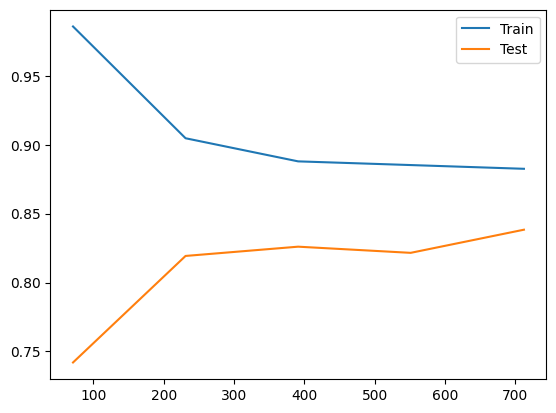

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X, y, cv=5
)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.legend()


In [27]:
X_test = pd.get_dummies(test_data[features])
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test_pred})
output.to_csv('submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
